Nama: Renata Aqila Ridha Putri

NIM: 2702244284

Penjelasan Dataset 2:

    a. Gender = Laki-laki atau Wanita

    b. Age = Usia seseorang dalam tahun
    
    c. Height = Tinggi dalam meter
    
    d. Weight = Berat dalam kilogram
    
    e. family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan
    
    f. FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)
    
    g. FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3)
    
    h. NCP = Jumlah makanan utama per hari\
    
    i. CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu)
    
    j. SMOKE = Apakah orang tersebut merokok (ya/tidak)
    
    k. CH2O = Asupan air harian (skala dari 1 hingga 3)
    
    l. SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak)
    
    m. FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3)
    
    n. TUE = Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)
    
    o. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)
    
    p. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)
    
    q. NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

### Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from imblearn.over_sampling import SMOTE
import joblib

In [2]:
df = pd.read_csv("ObesityDataSet2.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


### EDA

#### Checking Data Shape

In [3]:
df.shape

(1056, 17)

Dataset ini berisi **1.056 data** dengan **17 fitur** yang berkaitan dengan **gaya hidup, kebiasaan makan, aktivitas fisik, dan kebiasaan sehari-hari** seseorang. Dataset ini dirancang untuk **memprediksi dan mengklasifikasikan tingkat obesitas individu**, sehingga dapat membantu dalam melakukan pencegahan obesitas lebih awal melalui intervensi atau edukasi yang sesuai.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Dari info ini bisa disimpulkan beberapa informasi:
- Data type pada tiap kolom sudah tepat, kecuali kolom Age yang masih berupa 'object' atau 'string'.
- Ada missing values di kolom 'FCVC' dan 'MTRANS'.

In [5]:
for col in df.columns:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())
    print("-" * 40)



Value counts for Gender:

Male      532
Female    524
Name: Gender, dtype: int64
----------------------------------------

Value counts for Age:

21          128
23          118
18          107
26          102
19           79
22           73
20           69
24           42
17           36
25           35
30           29
31           29
38           23
27           21
33           19
34           15
32           14
29           13
16           12
37           11
39           11
28            9
41            9
35            9
40            8
21 years      4
55            3
44            3
36            2
46            2
19 years      2
45            2
23 years      2
22 years      2
42            2
33 years      1
48            1
51            1
43            1
17 years      1
15            1
26 years      1
36 years      1
20 years      1
25 years      1
14            1
Name: Age, dtype: int64
----------------------------------------

Value counts for Height:

1.75    63
1.70    62
1.6

Di kolom 'Age', masih terdapat string karena ada kata-kata **years**, untuk itu harus diperbaiki.

In [6]:
df['Age'] = df['Age'].str.replace('years', '', case=False)
df['Age'] = df['Age'].str.strip()

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].astype(int)

- Menghapus kata **years** dari setiap nilai pada kolom Age tanpa membedakan huruf besar atau kecil.

- Menghapus spasi yang tersisa setelah proses penghapusan satuan.

- Mengonversi data pada kolom Age menjadi tipe numerik.

- Mengonversi tipe data menjadi integer agar siap digunakan dalam proses analisis.

#### Check Missing Value

In [7]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [8]:
for col in df.columns:
    print(col, df[col].value_counts())

Gender Male      532
Female    524
Name: Gender, dtype: int64
Age 21    132
23    120
18    107
26    103
19     81
22     75
20     70
24     42
17     37
25     36
30     29
31     29
38     23
27     21
33     20
34     15
32     14
29     13
16     12
39     11
37     11
41      9
28      9
35      9
40      8
36      3
44      3
55      3
45      2
46      2
42      2
15      1
43      1
51      1
48      1
14      1
Name: Age, dtype: int64
Height 1.75    63
1.70    62
1.65    51
1.76    50
1.62    44
1.63    43
1.60    41
1.71    38
1.72    36
1.69    35
1.77    34
1.80    33
1.64    33
1.66    33
1.61    32
1.67    31
1.68    30
1.78    28
1.73    26
1.82    26
1.74    25
1.85    24
1.79    24
1.56    18
1.84    17
1.83    17
1.55    17
1.81    16
1.59    15
1.58    14
1.57    14
1.54    12
1.53    11
1.50    10
1.52     8
1.87     8
1.91     8
1.86     6
1.89     5
1.90     4
1.88     4
1.51     3
1.92     3
1.93     1
1.95     1
1.45     1
1.49     1
Name: Height, dtype: int64

#### Impute Missing Value

In [9]:
df['FCVC'] = df['FCVC'].fillna(df['FCVC'].mean())

df['MTRANS'] = df['MTRANS'].fillna(df['MTRANS'].mode()[0])


- Kolom FCVC (frekuensi konsumsi sayuran):

-> Missing values diisi dengan nilai rata-rata (mean) dari kolom tersebut.

- Kolom MTRANS (moda transportasi utama):

-> Missing values diisi dengan nilai modus (mode) atau kategori yang paling sering muncul.

In [10]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [12]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,24.235795,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,6.321129,0.091560,26.181219,0.528080,0.804457,0.612930,0.850452,0.615533
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,23.000000,1.700000,82.635000,2.421374,3.000000,2.000000,1.000000,0.583000
75%,26.000000,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,55.000000,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   int32  
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1056 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

#### Split Numerical and Categorical Columns

In [14]:
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                       'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'NObeyesdad'

#### Unique Value for Categorical Columns

In [15]:
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))


Unique values in Gender:
Male      532
Female    524
Name: Gender, dtype: int64

Unique values in family_history_with_overweight:
yes    862
no     194
Name: family_history_with_overweight, dtype: int64

Unique values in FAVC:
yes    935
no     121
Name: FAVC, dtype: int64

Unique values in CAEC:
Sometimes     870
Frequently    129
Always         29
no             28
Name: CAEC, dtype: int64

Unique values in SMOKE:
no     1034
yes      22
Name: SMOKE, dtype: int64

Unique values in SCC:
no     1001
yes      55
Name: SCC, dtype: int64

Unique values in CALC:
Sometimes     696
no            328
Frequently     31
Always          1
Name: CALC, dtype: int64

Unique values in MTRANS:
Public_Transportation    799
Automobile               216
Walking                   29
Motorbike                  8
Bike                       4
Name: MTRANS, dtype: int64


#### Barplot Target Variable

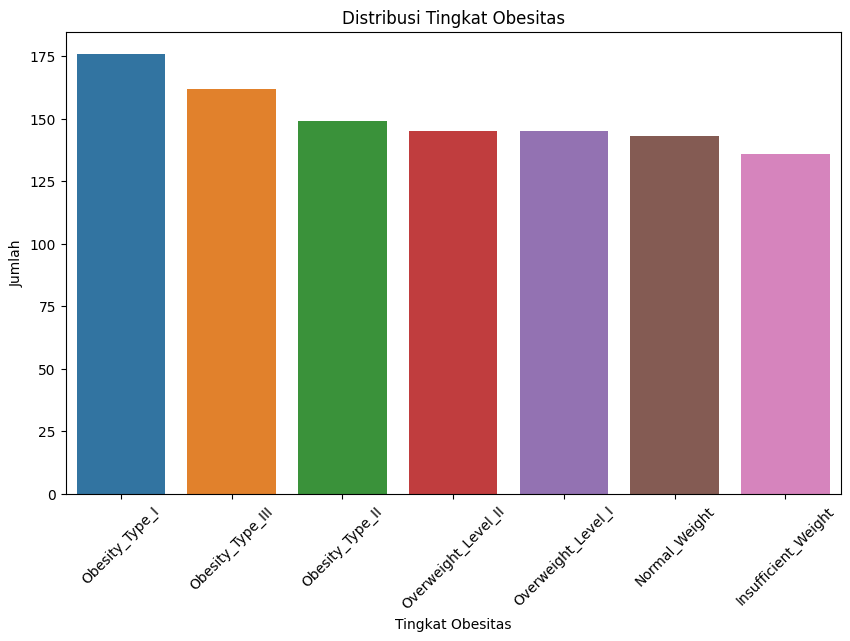

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Tingkat Obesitas')
plt.xlabel('Tingkat Obesitas')
plt.ylabel('Jumlah')
plt.show()

#### Barplot for Categorical

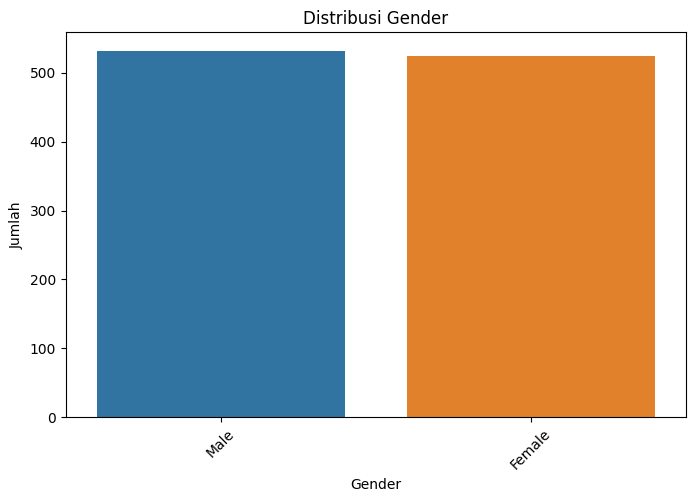

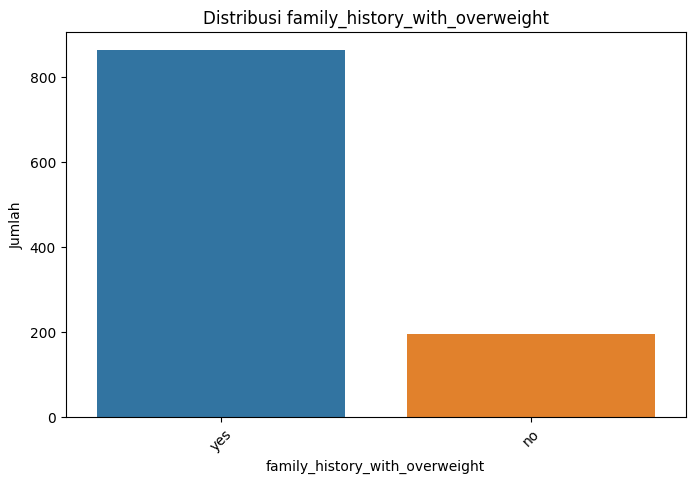

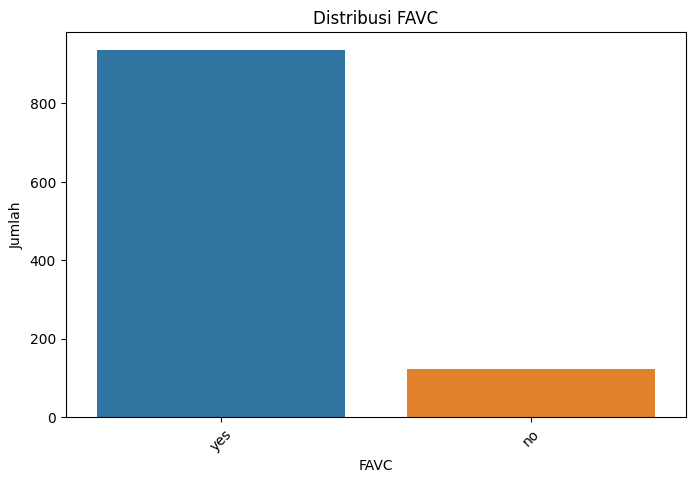

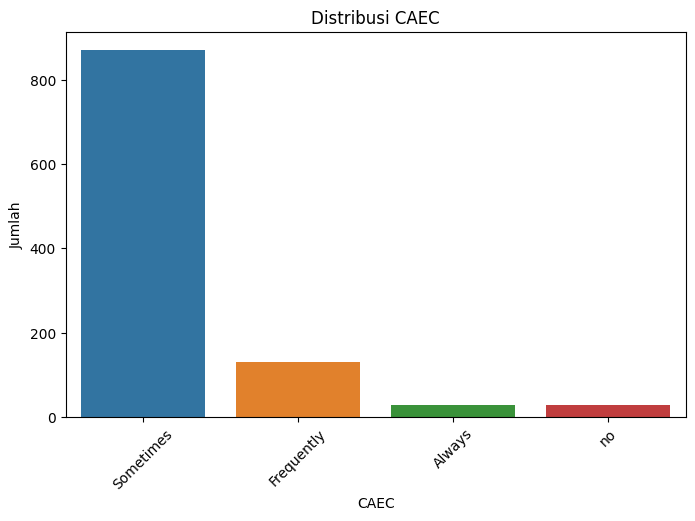

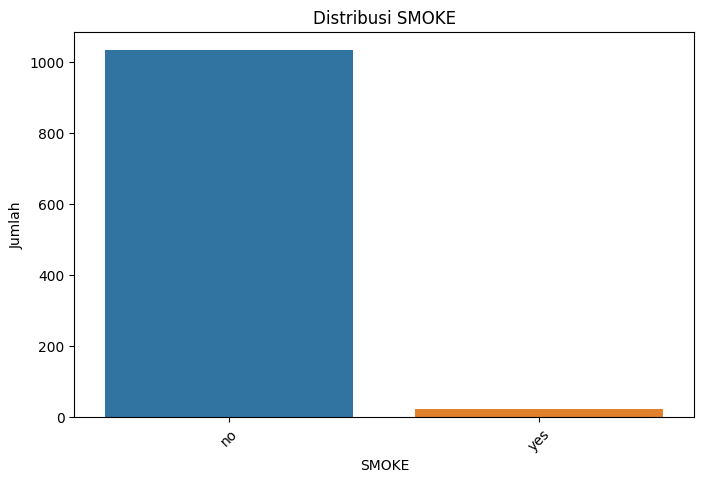

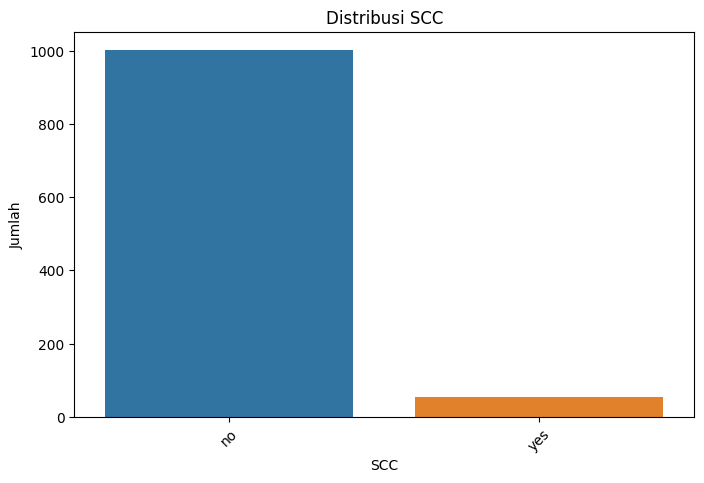

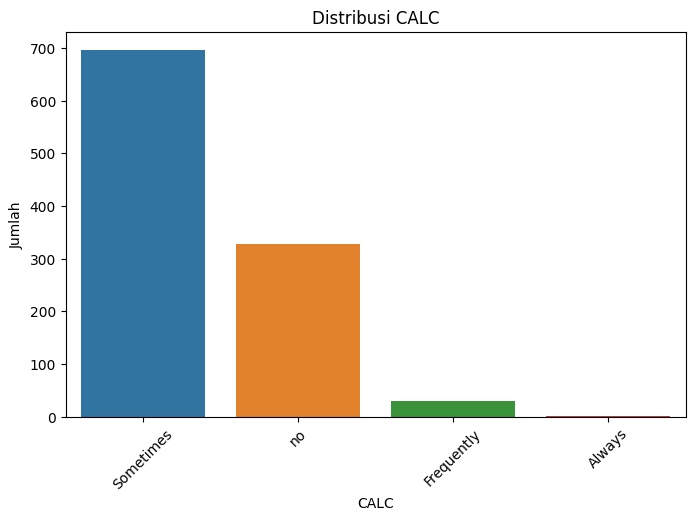

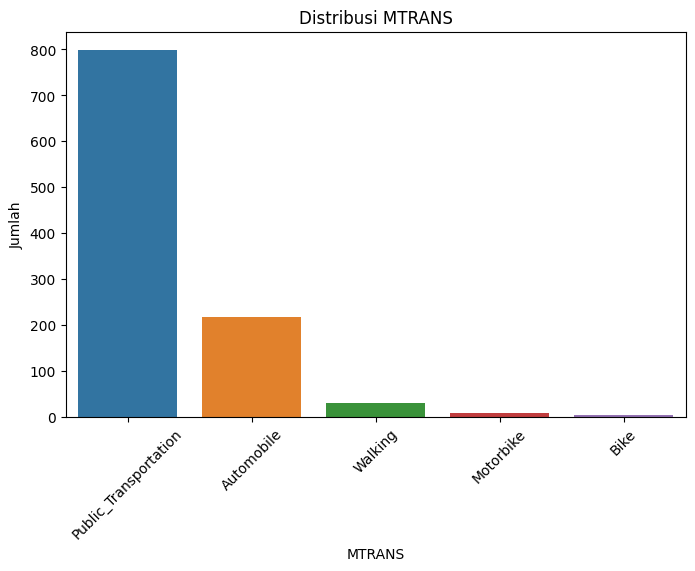

In [17]:
for col in categorical_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.show()

#### Boxplot for Numerical

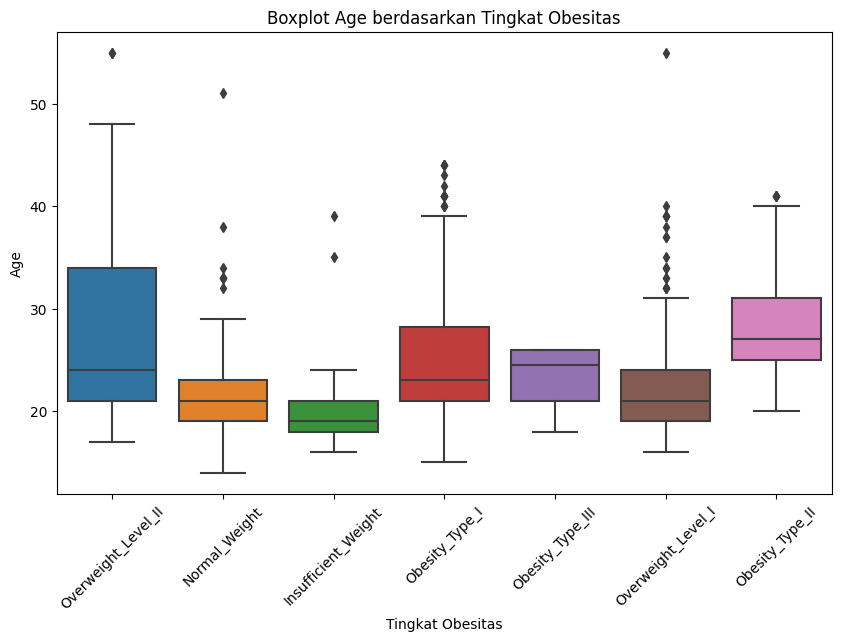

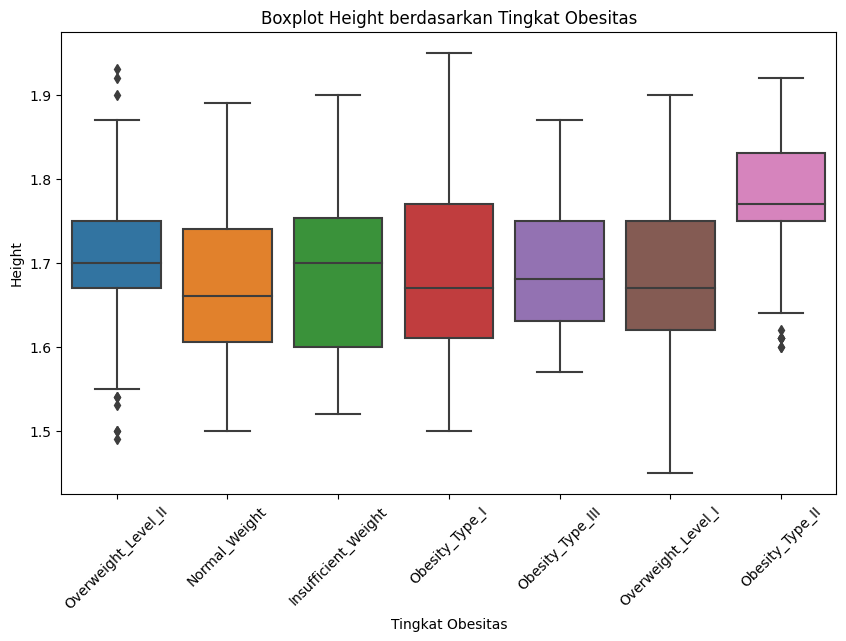

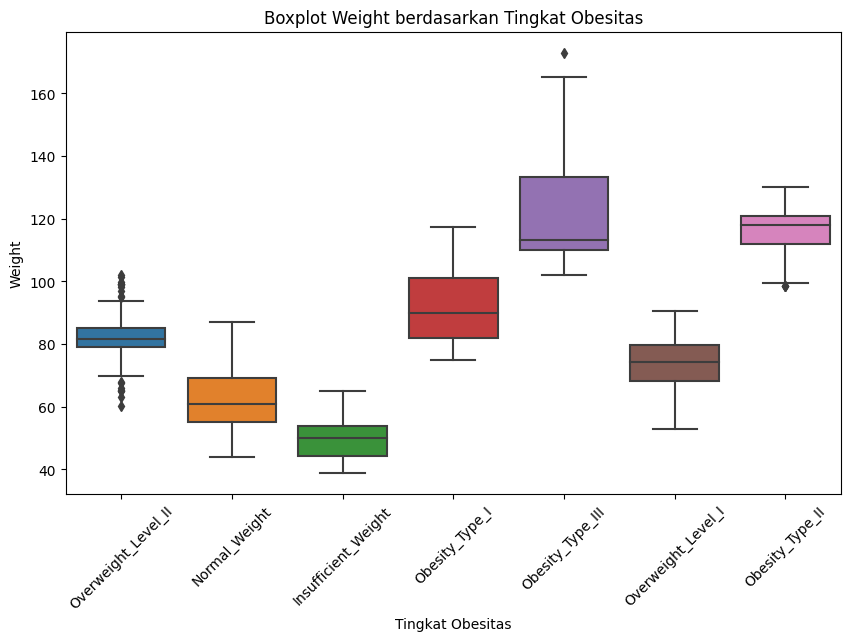

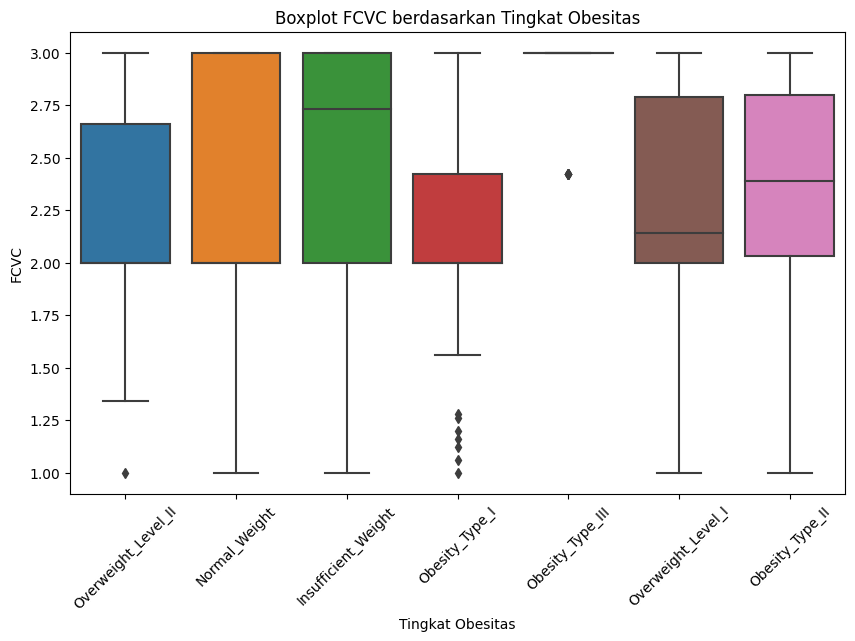

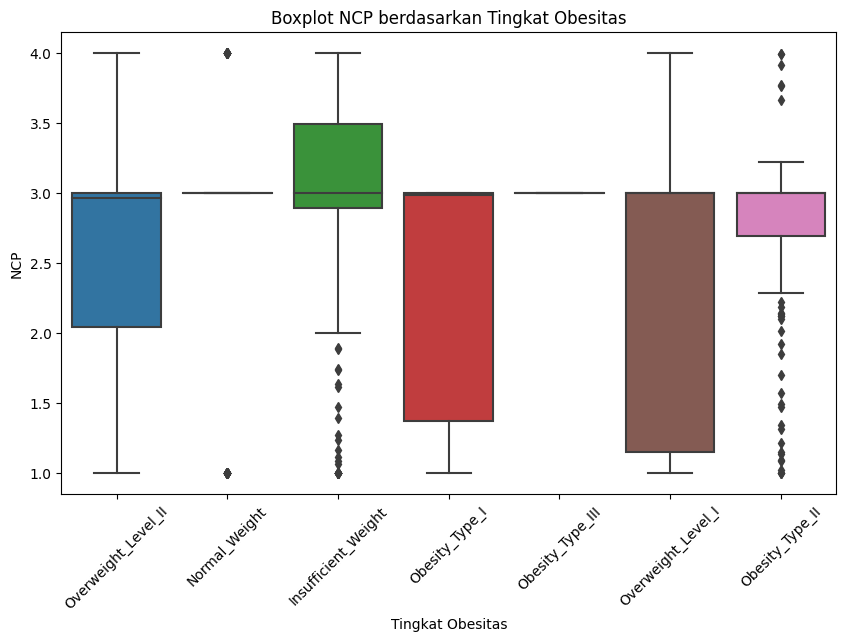

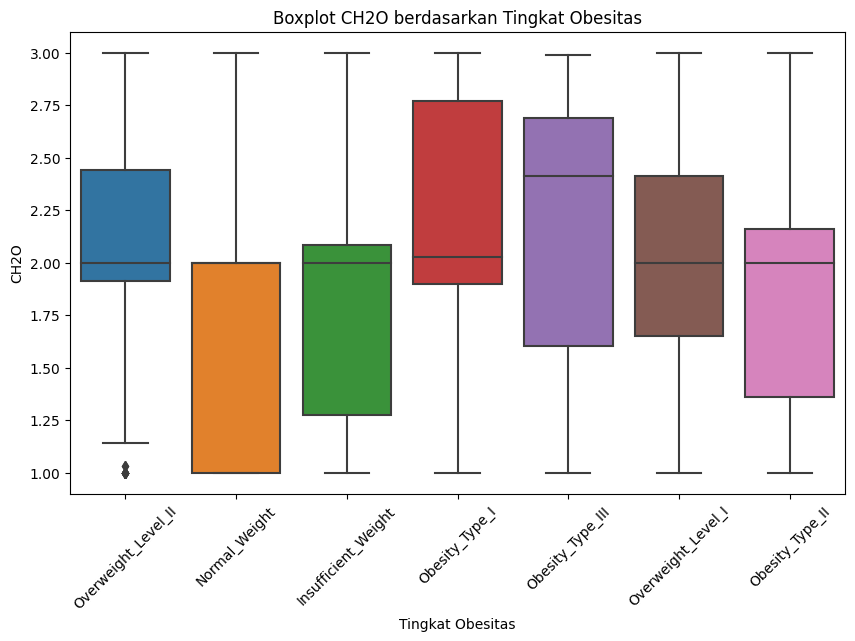

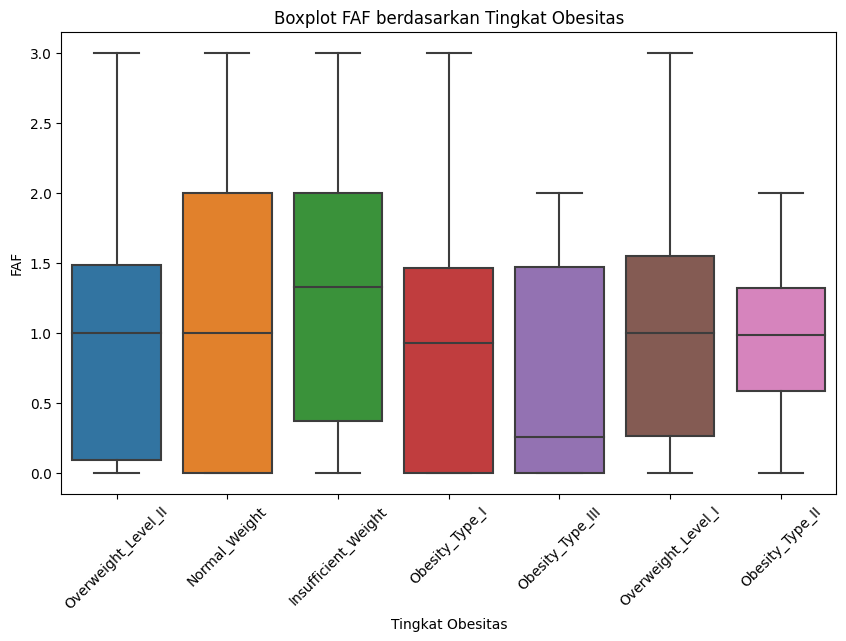

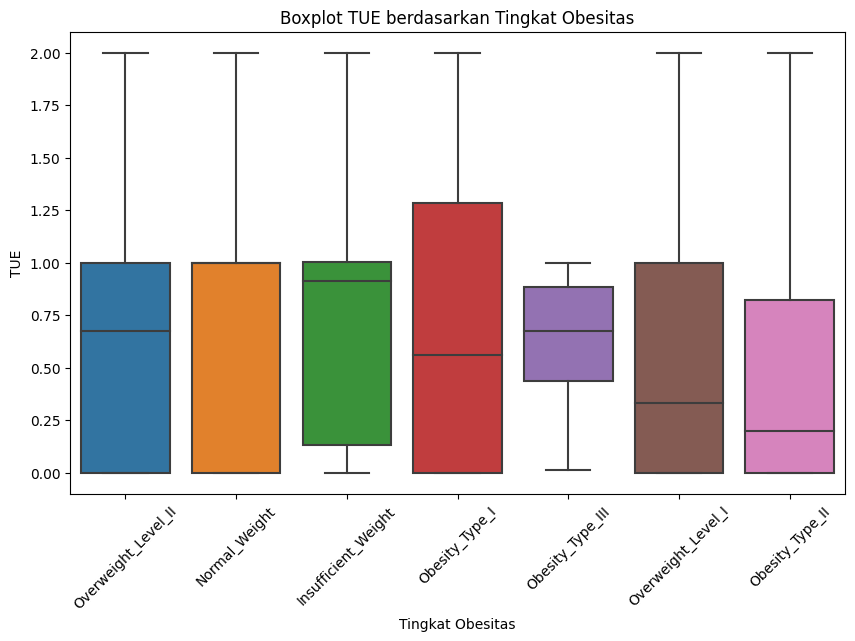

In [18]:
for col in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='NObeyesdad', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Boxplot {col} berdasarkan Tingkat Obesitas')
    plt.xlabel('Tingkat Obesitas')
    plt.ylabel(col)
    plt.show()

**Handling Outliers**

In [19]:
#for col in numeric_columns:
#    Q1 = df[col].quantile(0.25)
#    Q3 = df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#
#    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
#    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

#### Encoding 

In [20]:
binary_mapping = {
    "Gender": {"Female": 0, "Male": 1},
    "family_history_with_overweight": {"no": 0, "yes": 1},
    "FAVC": {"no": 0, "yes": 1},
    "SMOKE": {"no": 0, "yes": 1},
    "SCC": {"no": 0, "yes": 1}
}

df = df.replace(binary_mapping)

caec_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
df['CAEC'] = df['CAEC'].astype(str).str.strip()
df['CAEC'] = df['CAEC'].replace(caec_mapping)

calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
df['CALC'] = df['CALC'].astype(str).str.strip()
df['CALC'] = df['CALC'].replace(calc_mapping)

mtrans_mapping = {
    'Automobile': 0,
    'Bike': 1,
    'Motorbike': 2,
    'Public_Transportation': 3,
    'Walking': 4
}
df['MTRANS'] = df['MTRANS'].astype(str).str.strip()
df['MTRANS'] = df['MTRANS'].replace(mtrans_mapping)


Proses ini bertujuan untuk mengonversi data kategorikal dalam bentuk string menjadi data numerik agar bisa digunakan dalam pemodelan machine learning. Fungsi astype(str).str.strip() digunakan untuk memastikan bahwa data sudah dalam bentuk string dan bebas dari spasi berlebih yang bisa menyebabkan mapping gagal.


In [21]:
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df[target_column] = df[target_column].replace(target_mapping)


In [22]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,24,1.58,65.29,1,0,2.03,2.74,1,0,2.00,0,1.28,1.019,0,3,3
1,1,23,1.65,66.00,0,0,3.00,3.00,1,0,2.00,0,3.00,0.000,0,3,1
2,0,21,1.69,51.26,1,1,3.00,3.18,2,0,1.91,0,0.48,0.625,0,3,0
3,0,22,1.69,65.00,1,1,2.00,3.00,1,0,2.00,0,1.00,1.000,1,3,1
4,0,23,1.61,82.64,1,1,2.96,1.00,1,0,2.98,0,0.74,2.000,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0,21,1.74,130.93,1,1,3.00,3.00,1,0,1.85,0,1.46,0.962,1,3,6
1052,0,17,1.54,57.26,0,1,1.97,2.34,1,0,1.71,1,0.10,1.191,1,3,2
1053,0,19,1.60,45.00,0,0,3.00,3.00,0,0,3.00,1,2.00,0.000,0,4,0
1054,0,25,1.69,113.45,1,1,3.00,3.00,1,0,2.99,0,0.39,0.284,1,3,6


#### Heatmap

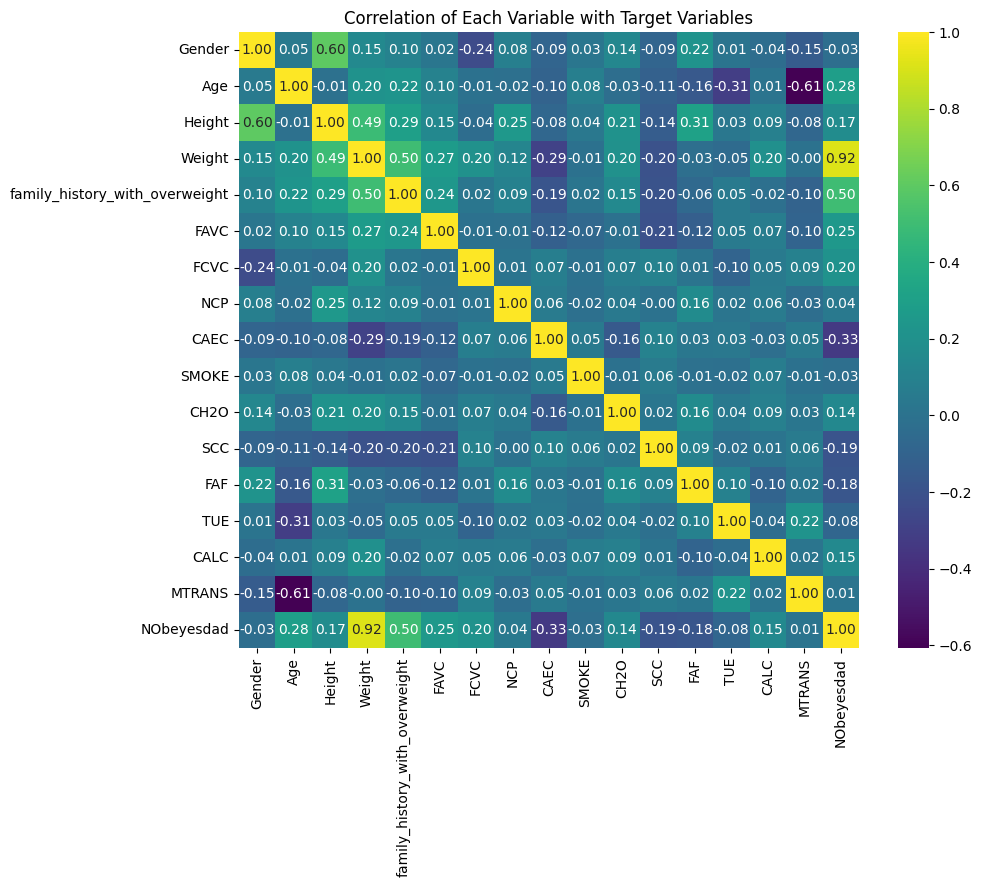

In [23]:
numeric_data = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation of Each Variable with Target Variables")
plt.show()

Heatmap ini menunjukkan korelasi antar variabel.
- Faktor terkuat yang mempengaruhi obesitas dalam dataset ini adalah **Weight** dan **family_history_with_overweight**.

- Beberapa variabel gaya hidup seperti **CAEC** dan **MTRANS** juga memberikan pengaruh meski tidak sekuat berat badan.

- Mayoritas fitur memiliki korelasi yang lemah satu sama lain ➜ ini baik untuk model machine learning karena mengurangi risiko multikolinearitas.

### Classification

In [24]:
X = df.drop(columns=[target_column])
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kolom ‘NObeyesdad’ di set menjadi target variabel. Lalu, data dipisah menjadi 80% training dan 20% testing

In [25]:
print("shape X_train: ",X_train.shape)
print("shape X_test: ",X_test.shape)
print("shape y_train: ",y_train.shape)
print("shape y_test: ",y_test.shape)

shape X_train:  (844, 16)
shape X_test:  (212, 16)
shape y_train:  (844,)
shape y_test:  (212,)


In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

- **SMOTE(random_state=42)** menginisialisasi SMOTE dengan seed yang tetap agar hasilnya dapat direproduksi.

- **smote.fit_resample(X_train, y_train)** akan menambahkan data sintetis pada kelas minoritas di data training sehingga distribusi kelas menjadi lebih seimbang.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

target_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.8962264150943396

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.89      0.91        27
      Normal_Weight       0.79      0.86      0.83        36
 Overweight_Level_I       0.81      0.81      0.81        26
Overweight_Level_II       0.78      0.78      0.78        23
     Obesity_Type_I       0.97      0.91      0.94        34
    Obesity_Type_II       1.00      0.97      0.99        34
   Obesity_Type_III       0.97      1.00      0.98        32

           accuracy                           0.90       212
          macro avg       0.89      0.89      0.89       212
       weighted avg       0.90      0.90      0.90       212



- Model dapat memprediksi kategori Obesity_Type_II dan Obesity_Type_III dengan sangat baik, ditunjukkan oleh precision dan recall yang mendekati 1.

- Kategori Normal_Weight dan Overweight_Level_II memiliki performa yang relatif lebih rendah dibandingkan kelas lain. Hal ini bisa disebabkan oleh data yang lebih variatif atau jumlah sample yang kurang proporsional.

- Secara keseluruhan, model stabil dan cukup andal untuk memprediksi tingkat obesitas berdasarkan gaya hidup dan kebiasaan.

**Hyperparameter Tuning**

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_scaled, y_train_resampled)
print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Model):", accuracy)

target_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
print("\nClassification Report (Best Model):\n")
print(classification_report(y_test, y_pred_best, target_names=target_names))


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Accuracy (Best Model): 0.8962264150943396

Classification Report (Best Model):

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.89      0.91        27
      Normal_Weight       0.79      0.86      0.83        36
 Overweight_Level_I       0.81      0.81      0.81        26
Overweight_Level_II       0.78      0.78      0.78        23
     Obesity_Type_I       0.97      0.91      0.94        34
    Obesity_Type_II       1.00      0.97      0.99        34
   Obesity_Type_III       0.97      1.00      0.98        32

           accuracy                           0.90       212
          macro avg       0.89      0.89      0.89       212
       weighted avg       0.90      0.90      0.90       212



Hyperparameter tuning membantu mengoptimalkan performa Random Forest, namun perubahan performa secara signifikan tidak terjadi karena model awal sudah cukup optimal.

#### XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [32]:
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False, 
    eval_metric='mlogloss', 
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_resampled)
y_predict = xgb_model.predict(X_test_scaled)

In [33]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy (XGBoost Model):", accuracy)

target_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

print('\nClassification Report (XGBoost Model)\n')
print(classification_report(y_test, y_predict, target_names=target_names))


Accuracy (XGBoost Model): 0.9528301886792453

Classification Report (XGBoost Model)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.90      0.97      0.93        36
 Overweight_Level_I       0.92      0.88      0.90        26
Overweight_Level_II       0.88      0.91      0.89        23
     Obesity_Type_I       0.97      0.94      0.96        34
    Obesity_Type_II       1.00      0.97      0.99        34
   Obesity_Type_III       1.00      1.00      1.00        32

           accuracy                           0.95       212
          macro avg       0.95      0.95      0.95       212
       weighted avg       0.95      0.95      0.95       212



- Model XGBoost berhasil meningkatkan precision dan recall di semua kelas dibandingkan Random Forest.

- Kelas Obesity_Type_III dan Obesity_Type_II diprediksi dengan performa sempurna atau hampir sempurna.

- Model mampu memperbaiki performa pada kelas Normal_Weight dan Overweight_Level_II yang sebelumnya menjadi kelemahan pada model Random Forest.

**Hyperparameter Tuning**

In [34]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 2]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=1,
    verbose=2
)

grid_search_xgb.fit(X_train_scaled, y_train_resampled)
print("Tuned Hyperparameters:", grid_search_xgb.best_params_)

best_model_xgb = grid_search_xgb.best_estimator_
y_predict_xgb = best_model_xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_predict_xgb)
print("Accuracy (Best XGBoost Model):", accuracy)

target_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
print('\nClassification Report (Best XGBoost Model)\n')
print(classification_report(y_test, y_predict_xgb, target_names=target_names))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_chil

XGBoost setelah hyperparameter tuning menjadi model terbaik dalam project ini, dengan akurasi yang tinggi dan distribusi prediksi yang merata di seluruh kelas.

#### Final Model - XGBoost

In [40]:
final_model = xgb.XGBClassifier(
    n_estimators=100,
    min_child_weight=2,
    max_depth=10,
    learning_rate=0.1,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

final_model.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, ...)

In [36]:
y_pred = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

target_names = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
print("\nClassification Report (Final Model):\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.9481132075471698

Classification Report (Final Model):

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.95      0.97      0.96        36
 Overweight_Level_I       0.85      0.88      0.87        26
Overweight_Level_II       0.91      0.91      0.91        23
     Obesity_Type_I       0.92      0.97      0.94        34
    Obesity_Type_II       1.00      0.94      0.97        34
   Obesity_Type_III       1.00      0.97      0.98        32

           accuracy                           0.95       212
          macro avg       0.95      0.94      0.95       212
       weighted avg       0.95      0.95      0.95       212

